**Bank Marketing: Exploratory Data Ananysis and Data Wrangling**

In [100]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from patsy import dmatrices
import dexplot as dxp

In [101]:
df = pd.read_csv('bank-full.csv')

In [102]:
df = df.drop(columns='duration')

In [103]:
df = df.rename(columns={'y':'subscribed'})

In [104]:
sub_df = df[df['subscribed']=='yes']

In [161]:
sub_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


In [106]:
df.nunique()

age             77
job             12
marital          3
education        4
default          2
balance       7168
housing          2
loan             2
contact          3
day             31
month           12
campaign        48
pdays          559
previous        41
poutcome         4
subscribed       2
dtype: int64

In [107]:
df['subscribed'].value_counts()

no     39922
yes     5289
Name: subscribed, dtype: int64

In [108]:
df.shape

(45211, 16)

In [109]:
df = df.drop_duplicates()

In [110]:
df.shape

(45195, 16)

In [111]:
non_scaled = df[['age', 'balance']]

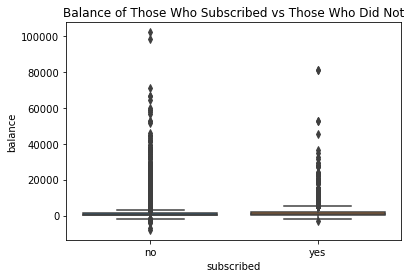

In [112]:
sns.boxplot(x = 'subscribed', y='balance', data=df).set(title='Balance of Those Who Subscribed vs Those Who Did Not')
plt.show()

In [113]:
age_df = df.groupby('subscribed', as_index=False)['age'].mean()

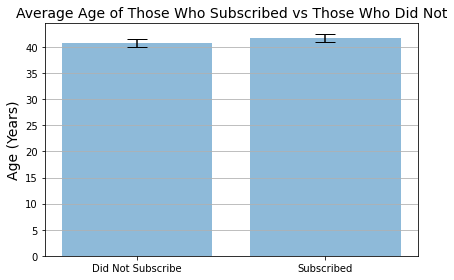

In [114]:
error=0.75
fig, ax = plt.subplots()
ax.bar(age_df['subscribed'], age_df['age'],
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

labels = ['Did Not Subscribe', 'Subscribed']
ax.set_xticks(age_df['subscribed'])
ax.set_xticklabels(labels, fontsize=10)
ax.set_title('Average Age of Those Who Subscribed vs Those Who Did Not', fontsize=14)
ax.yaxis.grid(True)
ax.set_ylabel("Age (Years)", fontsize=14)
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [115]:
subscribed_df = df[df['subscribed']=='yes']
did_not_subscribe_df = df[df['subscribed']=='no']

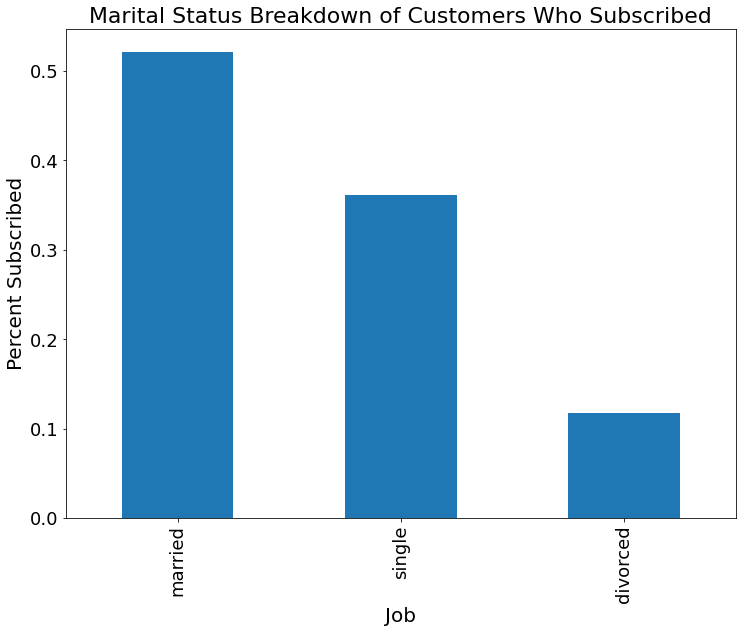

In [116]:
plt.figure(figsize=(12, 9))
(subscribed_df['marital'].value_counts() / len(subscribed_df)).plot.bar()
plt.ylabel('Percent Subscribed', fontsize=20)
plt.xlabel('Job', fontsize=20)
plt.title('Marital Status Breakdown of Customers Who Subscribed', size=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

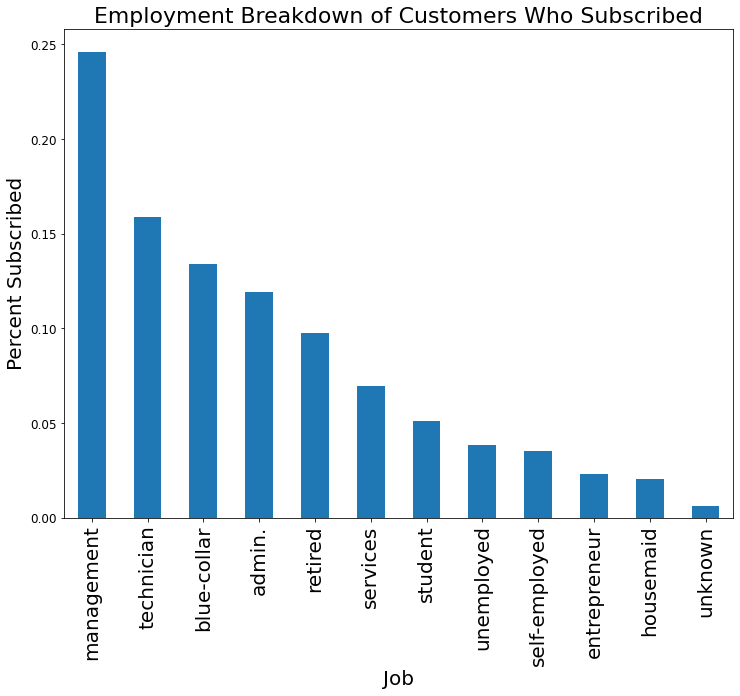

In [117]:
plt.figure(figsize=(12, 9))
(subscribed_df['job'].value_counts() / len(subscribed_df)).plot.bar()
plt.ylabel('Percent Subscribed', fontsize=20)
plt.xlabel('Job', fontsize=20)
plt.title('Employment Breakdown of Customers Who Subscribed', size=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.show()

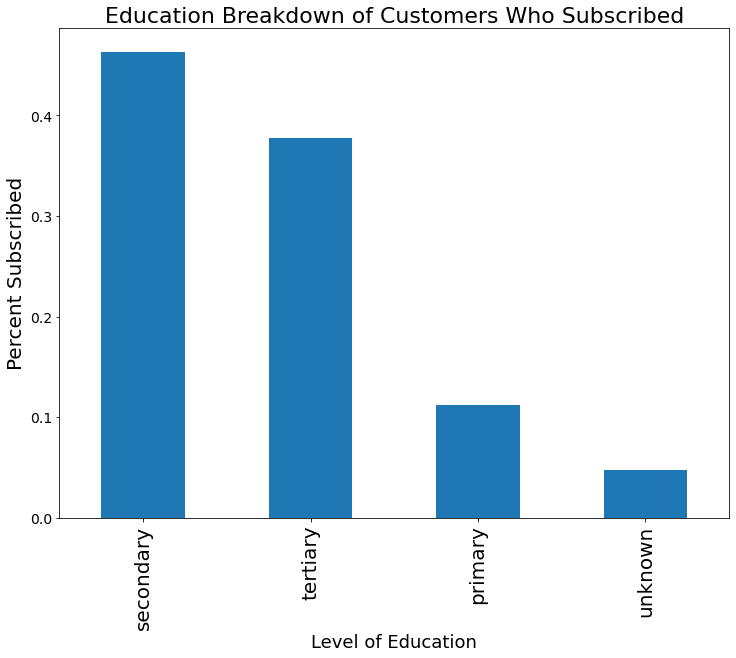

In [118]:
plt.figure(figsize=(12, 9))
(subscribed_df['education'].value_counts() / len(subscribed_df)).plot.bar()
plt.ylabel('Percent Subscribed', fontsize=20)
plt.xlabel('Level of Education', fontsize=18)
plt.title('Education Breakdown of Customers Who Subscribed', size=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)
plt.show()

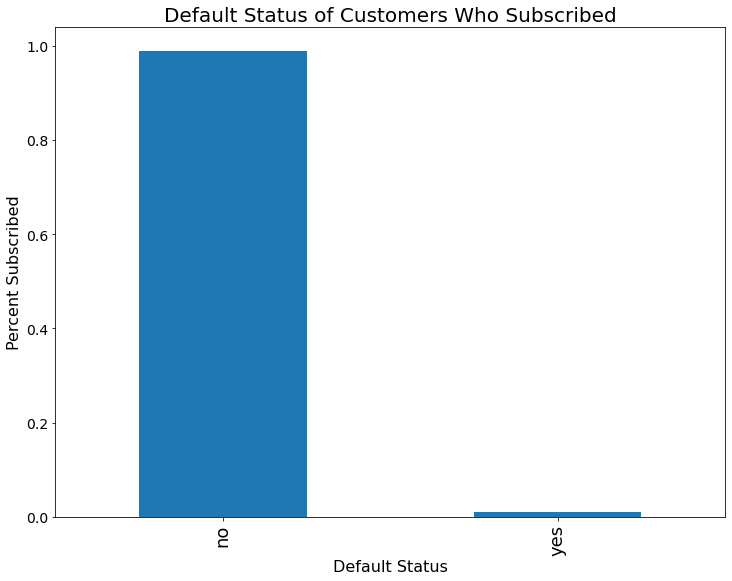

In [229]:
plt.figure(figsize=(12, 9))
(subscribed_df['default'].value_counts() / len(subscribed_df)).plot.bar()
plt.ylabel('Percent Subscribed', fontsize=16)
plt.xlabel('Default Status', fontsize=16)
plt.title('Default Status of Customers Who Subscribed', size=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.show()

In [120]:
balance_df = df.groupby('subscribed', as_index=False)['balance'].mean()

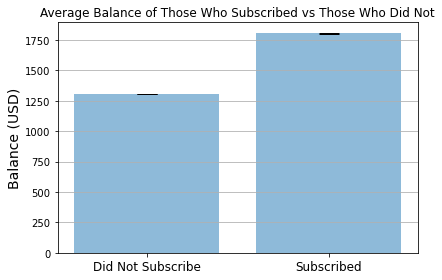

In [121]:
error=0.75
fig, ax = plt.subplots()
ax.bar(balance_df['subscribed'], balance_df['balance'],
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

labels = ['Did Not Subscribe', 'Subscribed']
ax.set_xticks(balance_df['subscribed'])
ax.set_xticklabels(labels, fontsize=12)
ax.set_title('Average Balance of Those Who Subscribed vs Those Who Did Not')
ax.yaxis.grid(True)
ax.set_ylabel('Balance (USD)', fontsize=14)

plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

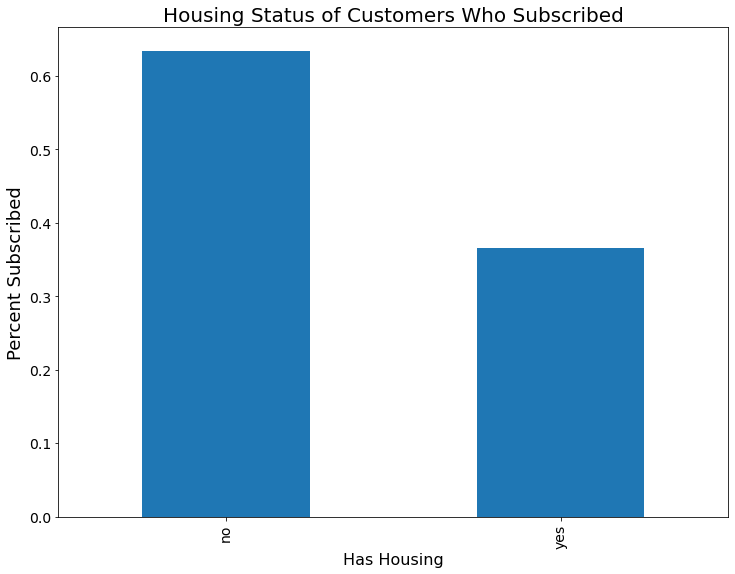

In [122]:
plt.figure(figsize=(12, 9))
(subscribed_df['housing'].value_counts() / len(subscribed_df)).plot.bar()
plt.ylabel('Percent Subscribed', fontsize=18)
plt.xlabel('Has Housing', fontsize=16)
plt.title('Housing Status of Customers Who Subscribed', size=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

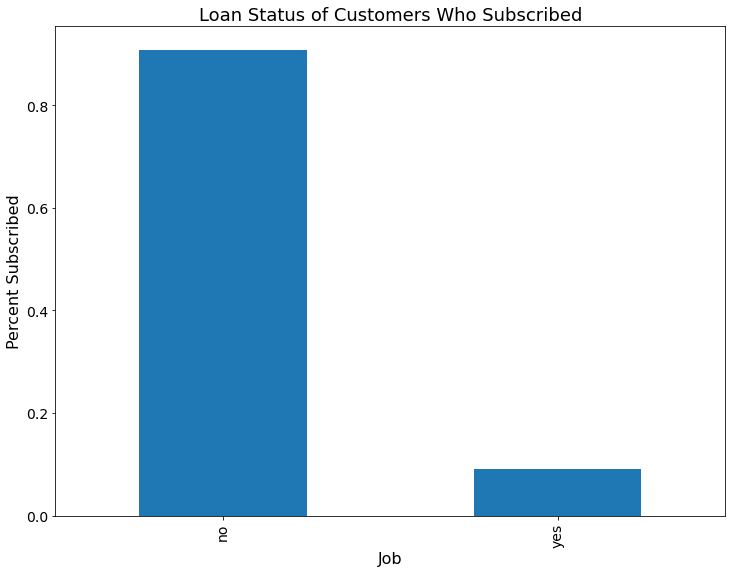

In [123]:
plt.figure(figsize=(12, 9))
(subscribed_df['loan'].value_counts() / len(subscribed_df)).plot.bar()
plt.ylabel('Percent Subscribed', fontsize=16)
plt.xlabel('Job', fontsize=16)
plt.title('Loan Status of Customers Who Subscribed', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

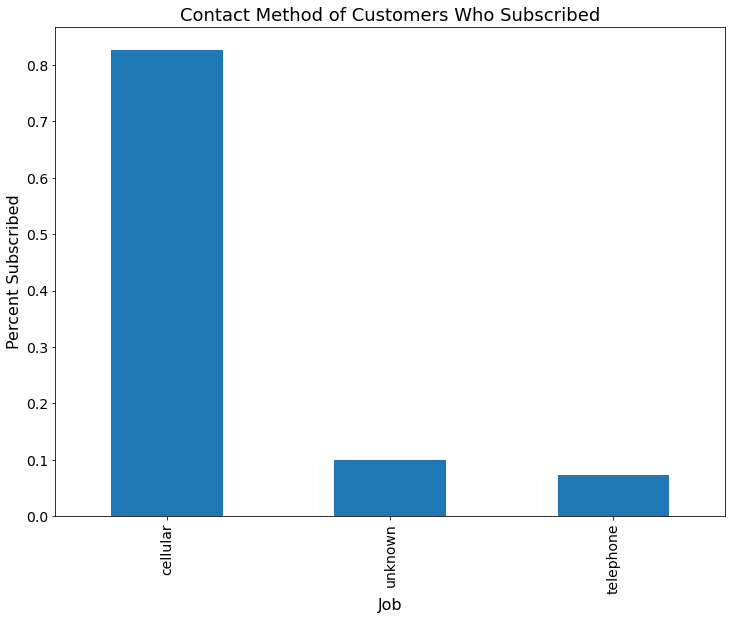

In [124]:
plt.figure(figsize=(12, 9))
(subscribed_df['contact'].value_counts() / len(subscribed_df)).plot.bar()
plt.ylabel('Percent Subscribed', fontsize=16)
plt.xlabel('Job', fontsize=16)
plt.title('Contact Method of Customers Who Subscribed', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

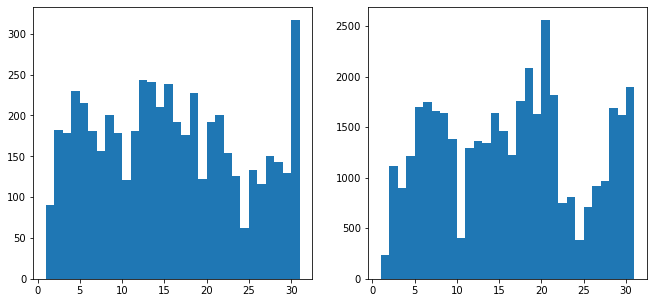

In [125]:
fig, ax =plt.subplots(1,2, figsize=(11, 5))
ax1 = subscribed_df['day'].hist(bins=30, grid=False, ax=ax[0])
ax2 = did_not_subscribe_df['day'].hist(bins=30, grid=False, ax=ax[1])

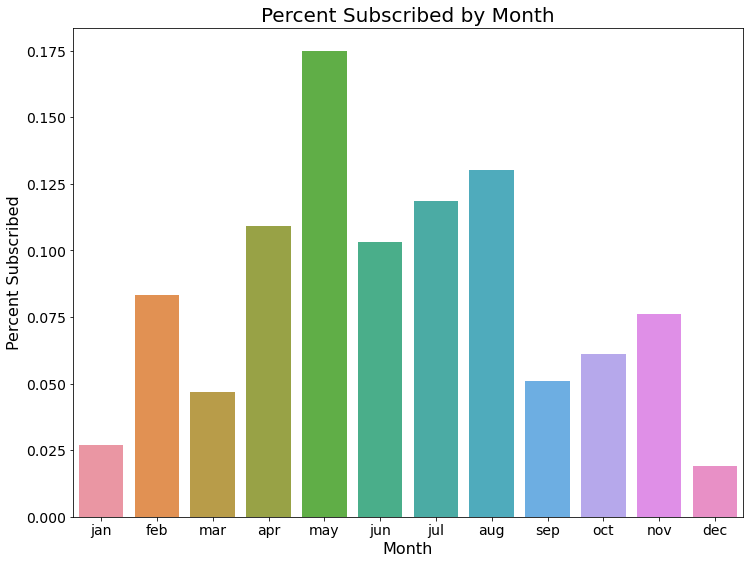

In [228]:
plt.figure(figsize=(12, 9))
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
          'aug', 'sep', 'oct', 'nov', 'dec']
month_freq_df = pd.DataFrame((subscribed_df['month'].value_counts() / len(subscribed_df)))
month_freq_df = month_freq_df.reset_index()
month_freq_df = month_freq_df.rename(columns={'index':'month', 'month':'percent_subscribed'})
month_freq_df.head()
sns.barplot(x = 'month', y='percent_subscribed', data=month_freq_df, order=months)
plt.title('Percent Subscribed by Month', fontsize=20)
plt.ylabel('Percent Subscribed', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

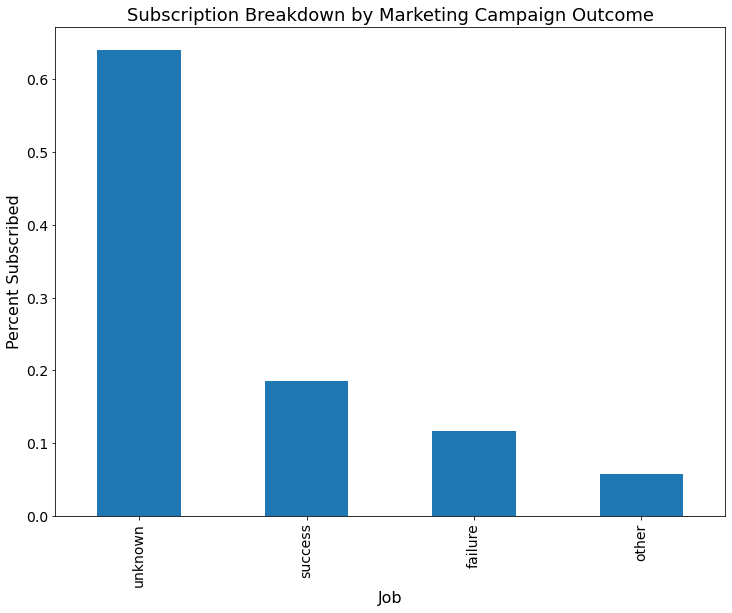

In [127]:
plt.figure(figsize=(12, 9))
(subscribed_df['poutcome'].value_counts() / len(subscribed_df)).plot.bar()
plt.ylabel('Percent Subscribed', fontsize=16)
plt.xlabel('Job', fontsize=16)
plt.title('Subscription Breakdown by Marketing Campaign Outcome', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

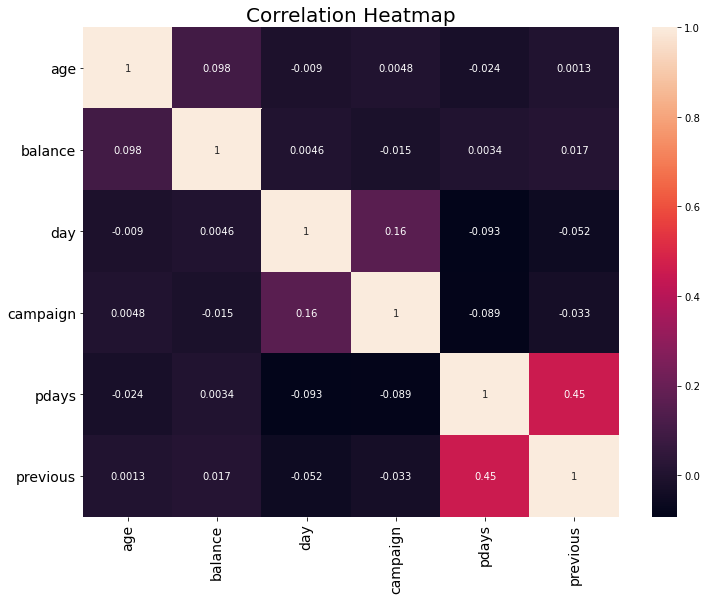

In [128]:
plt.figure(figsize=(12, 9))
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(fontsize=14, rotation='vertical')
plt.yticks(fontsize=14, rotation='horizontal')
plt.show()

**Scale Continuous Variables**

In [129]:
dummy_df = pd.get_dummies(df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']], drop_first = True)
dummy_df.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [130]:
df['subscribed'] = df.subscribed.map(dict(yes=1, no=0))

In [131]:
df = pd.concat([non_scaled, dummy_df, df['subscribed']], axis=1)
list(df.columns)
df.head()

,age,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,subscribed
0,58,2143,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [132]:
Xtrain = df.drop(columns='subscribed')
Xtrain = sm.add_constant(Xtrain)
ytrain = df['subscribed']

In [133]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = Xtrain.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(Xtrain.values, i) for i in range(len(Xtrain.columns))] 
  
print(vif_data)

                feature        VIF
0                 const  85.431675
1                   age   1.721852
2               balance   1.052094
3       job_blue-collar   2.508518
4      job_entrepreneur   1.304805
5         job_housemaid   1.290086
6        job_management   3.028991
7           job_retired   1.701976
8     job_self-employed   1.323517
9          job_services   1.647246
10          job_student   1.258194
11       job_technician   2.116231
12       job_unemployed   1.244329
13          job_unknown   1.093454
14      marital_married   2.535997
15       marital_single   2.882421
16  education_secondary   2.604669
17   education_tertiary   3.389794
18    education_unknown   1.304095
19          default_yes   1.014999
20          housing_yes   1.446043
21             loan_yes   1.061602
22    contact_telephone   1.089940
23      contact_unknown   2.369753
24            month_aug   3.020379
25            month_dec   1.083113
26            month_feb   1.828124
27            month_

In [134]:
log_reg = sm.Logit(ytrain, Xtrain).fit() 

Optimization terminated successfully.
         Current function value: 0.301779
         Iterations 7


In [135]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             subscribed   No. Observations:                45195
Model:                          Logit   Df Residuals:                    45157
Method:                           MLE   Df Model:                           37
Date:                Tue, 16 Feb 2021   Pseudo R-squ.:                  0.1639
Time:                        20:42:38   Log-Likelihood:                -13639.
converged:                       True   LL-Null:                       -16313.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3445      0.142     -9.468      0.000      -1.623      -1.066
age                     0.0016      0.002      0.822      0.411      -0.002       0.005
balance              1.669e-05   4.48e-06      3.728      0.000    7.92e-06    2.55e-05
job_blue-collar        -0.1238      0.065     -1.908      0.056      -0.251       0.003
job_entrepreneur       -0.1998      0.111     -1.796      0.073      -0.418       0.018
job_housemaid          -0.2921      0.120     -2.435      0.015      -0.527      -0.057
job_management         -0.0552      0.066     -0.840      0.401      -0.184       0.074
job_retired             0.4235      0.086      4.899      0.000       0.254       0.593
job_self-employed      -0.0972      0.099     -0.980      0.327      -0.292       0.097
job_services           -0.0824      0.075     -1.106      0.269      -0.228       0.064
job_student             0.3451      0.099      3.473      0.001       0.150       0.540
job_technician         -0.0657      0.062     -1.062      0.288      -0.187       0.056
job_unemployed          0.1249      0.098      1.279      0.201      -0.067       0.316
job_unknown            -0.2061      0.208     -0.991      0.322      -0.614       0.202
marital_married        -0.2068      0.052     -3.991      0.000      -0.308      -0.105
marital_single          0.0992      0.059      1.676      0.094      -0.017       0.215
education_secondary     0.1549      0.057      2.725      0.006       0.043       0.266
education_tertiary      0.3184      0.066      4.804      0.000       0.188       0.448
education_unknown       0.1977      0.092      2.139      0.032       0.017       0.379
default_yes            -0.1329      0.147     -0.904      0.366      -0.421       0.155
housing_yes            -0.5369      0.038    -14.021      0.000      -0.612      -0.462
loan_yes               -0.3967      0.053     -7.466      0.000      -0.501      -0.293
contact_telephone      -0.2964      0.065     -4.573      0.000      -0.423      -0.169
contact_unknown        -1.3472      0.063    -21.238      0.000      -1.471      -1.223
month_aug              -0.9707      0.069    -14.168      0.000      -1.105      -0.836
month_dec               0.5644      0.162      3.481      0.000       0.247       0.882
month_feb              -0.4425      0.075     -5.895      0.000      -0.590      -0.295
month_jan              -1.0710      0.106    -10.078      0.000      -1.279      -0.863
month_jul              -0.7869      0.068    -11.618      0.000      -0.920      -0.654
month_jun               0.1048      0.081      1.295      0.195      -0.054       0.263
month_mar               1.0616      0.110      9.622      0.000       0.845       1.278
month_may              -0.5010      0.063     -7.894      0.000      -0.625      -0.377
month_nov              -0.8522      0.075    -11.425      0.000      -0.998      -0.706
month_oct               0.6725      0.098      6.870      0.000       0.4

In [136]:
num_vars = df[['age', 'balance']]

In [137]:
scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(num_vars))

In [138]:
X_train.columns = ['age_scaled', 'balance_scaled']

In [139]:
X_train

,age_scaled,balance_scaled
0,1.266667,1.249263
1,0.333333,-0.309735
2,-0.400000,-0.329646
3,0.533333,0.779499
4,-0.400000,-0.330383
...,...,...
45190,0.800000,0.277286
45191,2.133333,0.943953
45192,2.200000,3.883481
45193,1.200000,0.161504


In [140]:
df.head()

,age,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,subscribed
0,58,2143,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [141]:
df = pd.concat([df, X_train], axis=1)

In [143]:
df.head()

,age,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,subscribed,age_scaled,balance_scaled
0,58.0,2143.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.266667,1.249263
1,44.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,-0.309735
2,33.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.400000,-0.329646
3,47.0,1506.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.533333,0.779499
4,33.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.400000,-0.330383


In [144]:
df = df.drop(columns = ['age', 'balance'])

In [145]:
df.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,subscribed,age_scaled,balance_scaled
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.266667,1.249263
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,-0.309735
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.400000,-0.329646
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.533333,0.779499
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.400000,-0.330383


In [146]:
df.isnull().sum()

job_blue-collar        16
job_entrepreneur       16
job_housemaid          16
job_management         16
job_retired            16
job_self-employed      16
job_services           16
job_student            16
job_technician         16
job_unemployed         16
job_unknown            16
marital_married        16
marital_single         16
education_secondary    16
education_tertiary     16
education_unknown      16
default_yes            16
housing_yes            16
loan_yes               16
contact_telephone      16
contact_unknown        16
month_aug              16
month_dec              16
month_feb              16
month_jan              16
month_jul              16
month_jun              16
month_mar              16
month_may              16
month_nov              16
month_oct              16
month_sep              16
poutcome_other         16
poutcome_success       16
poutcome_unknown       16
subscribed             16
age_scaled             16
balance_scaled         16
dtype: int64

In [147]:
df = df.dropna()
df.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,subscribed,age_scaled,balance_scaled
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.266667,1.249263
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,-0.309735
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.400000,-0.329646
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.533333,0.779499
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.400000,-0.330383


In [148]:
X, y = df.drop(columns='subscribed'), df['subscribed']

In [149]:
df

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,subscribed,age_scaled,balance_scaled
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.266667,1.249263
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,-0.309735
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.400000,-0.329646
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.533333,0.779499
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.400000,-0.330383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45190,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.800000,0.277286
45191,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.133333,0.943953
45192,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.200000,3.883481
45193,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.200000,0.161504


**Logistic Regression**

In [150]:
lr = LogisticRegression()
lr.fit(X, y)
i = list(lr.coef_[0])
lr_importances = []
for x in i:
    if x < 0:
        x *= -1
        lr_importances.append(x)
    else:
        lr_importances.append(x)
lr_importances = lr_importances = np.array(lr_importances)

In [151]:
for (i,v),c in zip(enumerate(lr_importances), X.columns):
    print(f'{c}, Score: %.5f' % (v))

job_blue-collar, Score: 0.12332
job_entrepreneur, Score: 0.18533
job_housemaid, Score: 0.28167
job_management, Score: 0.05047
job_retired, Score: 0.44891
job_self-employed, Score: 0.08841
job_services, Score: 0.08415
job_student, Score: 0.31079
job_technician, Score: 0.07110
job_unemployed, Score: 0.12903
job_unknown, Score: 0.19302
marital_married, Score: 0.20375
marital_single, Score: 0.08890
education_secondary, Score: 0.15017
education_tertiary, Score: 0.31989
education_unknown, Score: 0.19995
default_yes, Score: 0.14856
housing_yes, Score: 0.53786
loan_yes, Score: 0.40679
contact_telephone, Score: 0.27398
contact_unknown, Score: 1.34563
month_aug, Score: 0.97473
month_dec, Score: 0.54309
month_feb, Score: 0.44021
month_jan, Score: 1.06301
month_jul, Score: 0.78451
month_jun, Score: 0.10148
month_mar, Score: 1.03945
month_may, Score: 0.49100
month_nov, Score: 0.88046
month_oct, Score: 0.65071
month_sep, Score: 0.63929
poutcome_other, Score: 0.25012
poutcome_success, Score: 2.24549


In [152]:
#Get log odds of a 1-unit increase for each variable
arr = np.exp(lr.coef_)
log_odds = arr.tolist()
cols = list(X.columns)
dictionary = dict(zip(cols, log_odds[0]))
for k, v in dictionary.items():
    print(f'{k}, log odds of a 1-unit increase: {v}')

job_blue-collar, log odds of a 1-unit increase: 0.8839838668284903
job_entrepreneur, log odds of a 1-unit increase: 0.8308283735138384
job_housemaid, log odds of a 1-unit increase: 0.7545198648767162
job_management, log odds of a 1-unit increase: 0.9507783948697518
job_retired, log odds of a 1-unit increase: 1.5666043159009744
job_self-employed, log odds of a 1-unit increase: 0.915382885471285
job_services, log odds of a 1-unit increase: 0.91929544336773
job_student, log odds of a 1-unit increase: 1.364504903297889
job_technician, log odds of a 1-unit increase: 0.9313692611830765
job_unemployed, log odds of a 1-unit increase: 1.1377252356741117
job_unknown, log odds of a 1-unit increase: 0.8244693351533793
marital_married, log odds of a 1-unit increase: 0.8156669493835179
marital_single, log odds of a 1-unit increase: 1.0929661937111301
education_secondary, log odds of a 1-unit increase: 1.1620281313122585
education_tertiary, log odds of a 1-unit increase: 1.3769718920714873
education_

**Random Forest**

In [153]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X,y)
rf_importances = rf.feature_importances_

for (i,v),c in zip(enumerate(rf_importances), X.columns):
    print(f'{c}, Score: %.5f' % (v))

job_blue-collar, Score: 0.00985
job_entrepreneur, Score: 0.00009
job_housemaid, Score: 0.00000
job_management, Score: 0.00008
job_retired, Score: 0.00136
job_self-employed, Score: 0.00000
job_services, Score: 0.00017
job_student, Score: 0.00327
job_technician, Score: 0.00014
job_unemployed, Score: 0.00003
job_unknown, Score: 0.00000
marital_married, Score: 0.00676
marital_single, Score: 0.00165
education_secondary, Score: 0.00000
education_tertiary, Score: 0.00469
education_unknown, Score: 0.00008
default_yes, Score: 0.00007
housing_yes, Score: 0.06984
loan_yes, Score: 0.00302
contact_telephone, Score: 0.00011
contact_unknown, Score: 0.10267
month_aug, Score: 0.00000
month_dec, Score: 0.00968
month_feb, Score: 0.00005
month_jan, Score: 0.00002
month_jul, Score: 0.00152
month_jun, Score: 0.00790
month_mar, Score: 0.07932
month_may, Score: 0.02704
month_nov, Score: 0.00006
month_oct, Score: 0.03820
month_sep, Score: 0.04217
poutcome_other, Score: 0.00081
poutcome_success, Score: 0.24534


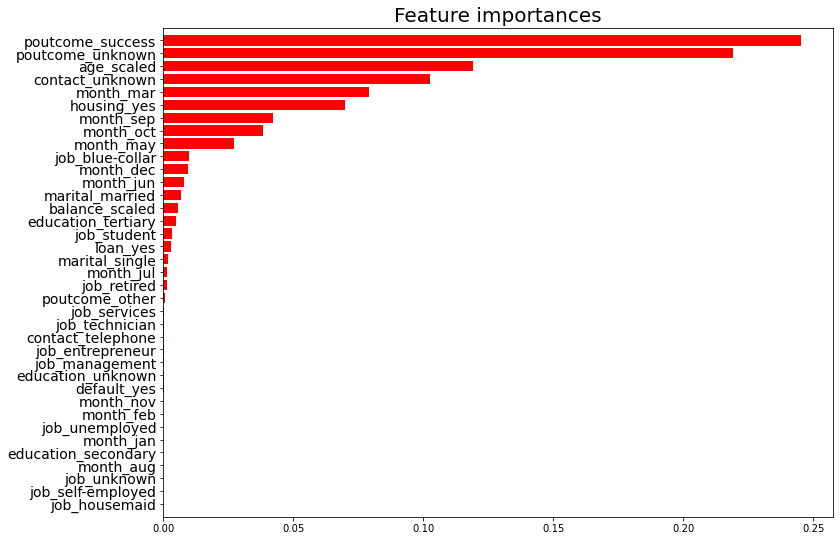

<Figure size 648x648 with 0 Axes>

In [154]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

indices = np.argsort(rf_importances)

# Plot the feature importances of the forest
plt.figure(figsize=(12,9))
plt.title("Feature importances", fontsize=20)
plt.barh(range(X.shape[1]), rf_importances[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), X.columns[indices], rotation = 'horizontal', fontsize=14)
plt.ylim([-1, X.shape[1]])
plt.figure(figsize=(9, 9))
plt.show()

In [155]:
bank_df = pd.concat([X, y], axis=1)
bank_df.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,age_scaled,balance_scaled,subscribed
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.266667,1.249263,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,-0.309735,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.400000,-0.329646,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.533333,0.779499,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.400000,-0.330383,0.0


In [156]:
bank_df.to_csv('bank_df.csv', index=False, header=True)